In [2]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.patches import Rectangle
import numpy as np
import datetime

In [3]:
# load a database for a stack
filepath = './a5n/stackdb/a5n_s0_db2.txt'

df = pd.read_csv(
        filepath,
        header=1)

# look at rows 35 to 45
df[35:45]


,i,roiType,roiTypeNum,x,y,z,channel,groupID,parentID,cPnt,...,error,dynBad,intBad,progType,analParam,userBool1,userBool2,userBool3,userType,Unnamed: 46
35,NaN,controlPnt,2,142.56,91.26,4,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,controlPnt,2,149.22,88.02,3,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,controlPnt,2,155.70,87.12,4,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,spineROI,0,143.46,123.12,8,NaN,NaN,2,512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,spineROI,0,146.52,118.63,11,NaN,NaN,2,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,spineROI,0,154.61,109.67,26,NaN,NaN,2,585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,spineROI,0,160.06,107.92,32,NaN,NaN,2,606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,spineROI,0,151.93,119.75,15,NaN,NaN,2,548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,spineROI,0,149.97,123.10,9,NaN,NaN,2,532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,pivotPnt,3,148.14,120.24,11,NaN,NaN,2,534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


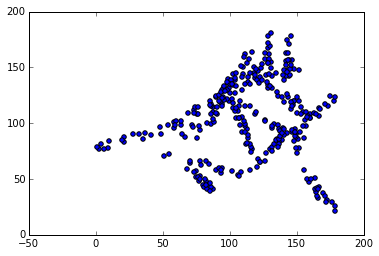

In [4]:
# plot x/y position of all points
plt.scatter(df['x'], df['y'])


(0, 204.8)

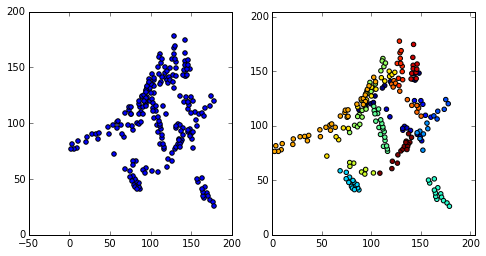

In [5]:
#grab a datframe of just spines
spines = df[df['roiType'] == 'spineROI']

plt.figure(figsize=(8,4))

# plot x/y posiiton of just spines
fig1 = plt.subplot(1,2,1)
fig1.scatter(spines['x'], spines['y'])

# plot and colorize by segment
fig2 = plt.subplot(1,2,2)
fig2.scatter(spines['x'], spines['y'], c=spines['parentID'])

# set the proper scale of the plot
# read the first line from the file (the header)
with open(filepath, 'U') as f:
    header = f.readline()

#THIS ALMOST WORKS
#print header
#keys = k, v = [i.split('=') for i in header.split(';')]
       
xVoxel, yVoxel = 0.2, 0.2 # um
pixelsPerLine, linesPerFrame = 1024, 1024
xWidth, yWidth = pixelsPerLine * xVoxel, linesPerFrame * yVoxel
plt.xlim([0,xWidth])
plt.ylim([0,yWidth])



(0, 204.8)

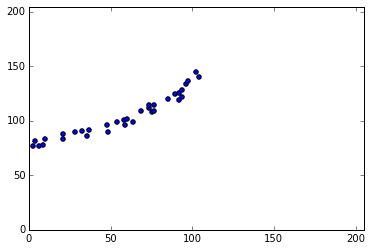

In [6]:
# plot just one segment
thisParentID = 11
oneSegment = df[(df['roiType'] == 'spineROI') & (df['parentID'] == thisParentID)]

plt.scatter(oneSegment['x'], oneSegment['y'])

plt.xlim([0,xWidth])
plt.ylim([0,yWidth])



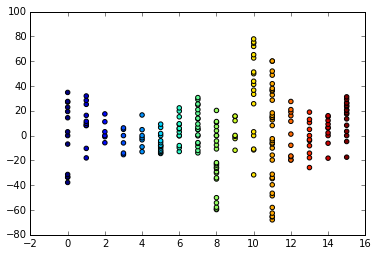

In [7]:
# plot position on dendrite line for each segment

# don't really need sort to make this plot but will use in future
sortedSpines = spines.sort(['parentID','pDist'])

c = sortedSpines['parentID']
plt.scatter(sortedSpines['parentID'], sortedSpines['pDist'], c=c)